# Data Understanding

In [1]:
import pandas as pd

In [47]:
df = pd.read_csv('shanghai_ranking_2024.csv')

In [48]:
df.head()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6
3,4,University of Cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6
4,5,"University of California, Berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5


In [49]:
df.tail()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
995,901-1000,Universidad Andrés Bello,4,0.0,0.0,6.5,4.0,21.1,9.5
996,901-1000,University of Lahore,3-5,0.0,0.0,0.0,1.4,27.5,11.7
997,901-1000,Linnaeus University,13,0.0,0.0,6.5,3.5,19.0,13.3
998,901-1000,University of Wuppertal,49-51,0.0,0.0,0.0,6.9,19.3,19.4
999,901-1000,Abdul Wali Khan University Mardan,3-5,0.0,0.0,6.5,3.8,20.9,9.4


In [89]:
print("Jumlah Baris : ", df.shape[0])
print("Jumlah Kolom : ", df.shape[1])

Jumlah Baris :  1000
Jumlah Kolom :  9


In [51]:
df.dtypes

Rank                       object
University_Name            object
National/Regional Rank     object
Alumni                    float64
Award                     float64
Hici                      float64
N&S                       float64
PUB                       float64
PCP                       float64
dtype: object

In [52]:
df.describe(include='all')

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
count,1000,1000,1000,1000.000000,1000.00000,1000.000000,989.000000,1000.000000,1000.000000
unique,87,1000,130,NaN,NaN,NaN,NaN,NaN,NaN
top,901-1000,Harvard University,1,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,1,60,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.509600,3.78120,10.734400,10.575126,35.113000,19.655300
std,NaN,NaN,NaN,10.103201,11.45538,10.949265,10.637247,13.684495,8.800436
min,NaN,NaN,NaN,0.000000,0.00000,0.000000,0.000000,9.300000,8.600000
25%,NaN,NaN,NaN,0.000000,0.00000,0.000000,3.900000,25.775000,14.100000
50%,NaN,NaN,NaN,0.000000,0.00000,9.200000,7.300000,31.700000,17.600000
75%,NaN,NaN,NaN,0.000000,0.00000,14.600000,13.300000,41.425000,23.000000


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
q1 = df.select_dtypes(exclude=['object']).quantile (0.25)
q3 = df.select_dtypes(exclude=['object']).quantile (0.75)
iqr = q3-q1
iqr

Alumni     0.00
Award      0.00
Hici      14.60
N&S        9.40
PUB       15.65
PCP        8.90
dtype: float64

In [55]:
batas_bawah = q1 - (1.5 * iqr)
batas_bawah

Alumni     0.00
Award      0.00
Hici     -21.90
N&S      -10.20
PUB        2.30
PCP        0.75
dtype: float64

In [56]:
batas_atas = q3 + (1.5 * iqr)
batas_atas

Alumni     0.00
Award      0.00
Hici      36.50
N&S       27.40
PUB       64.90
PCP       36.35
dtype: float64

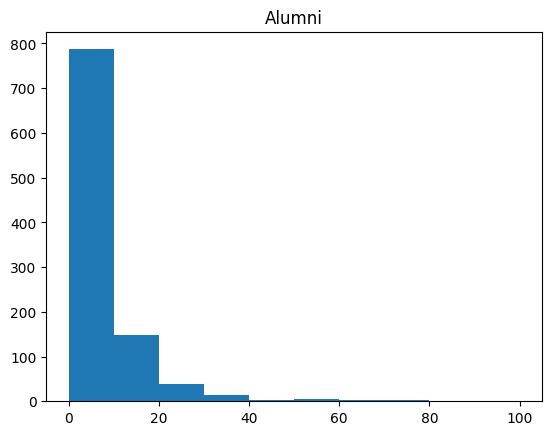

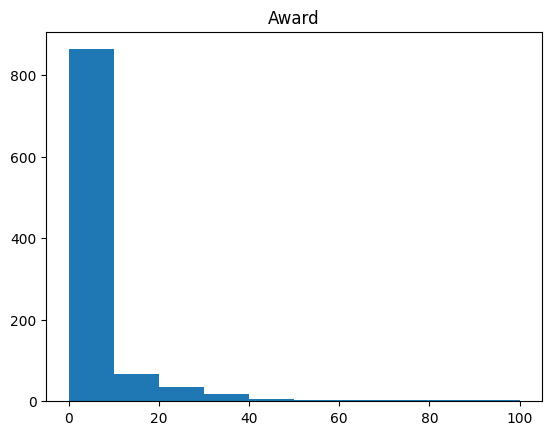

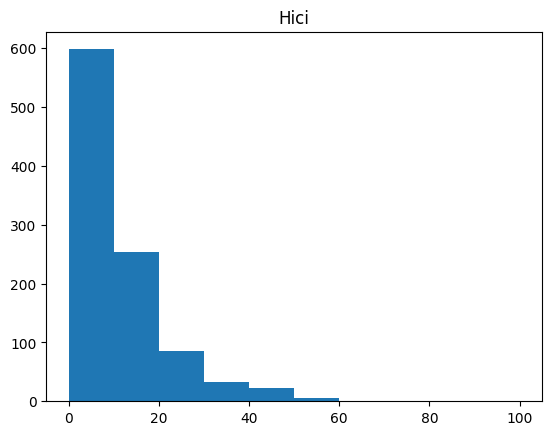

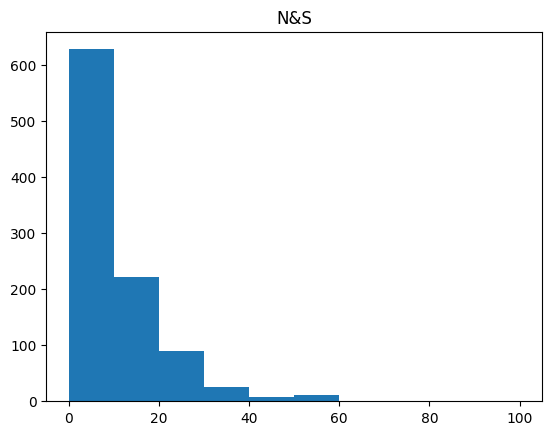

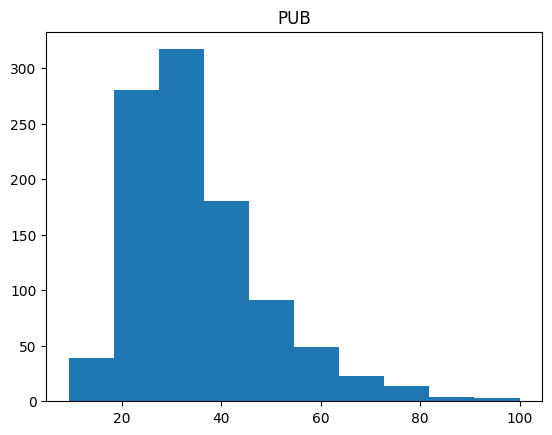

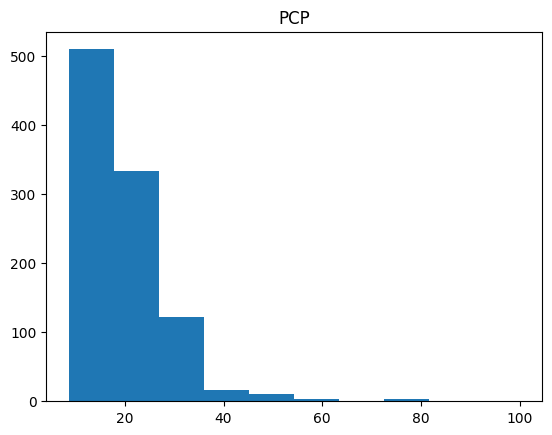

In [57]:
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.hist(df[column])
        plt.title(column)
        plt.show()

<Axes: >

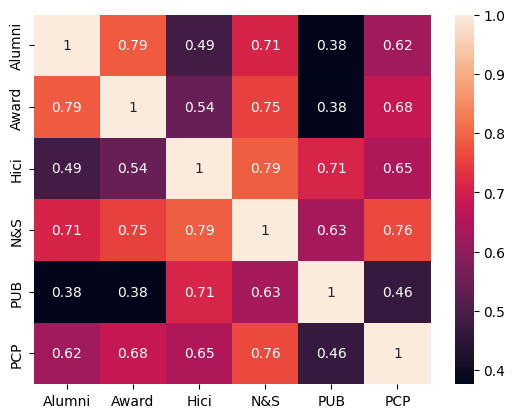

In [58]:
sns.heatmap(df.select_dtypes(exclude="object").corr(), annot=True)

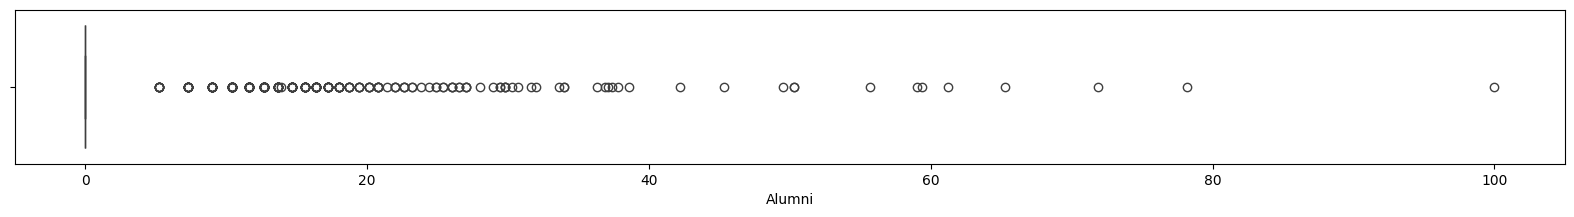

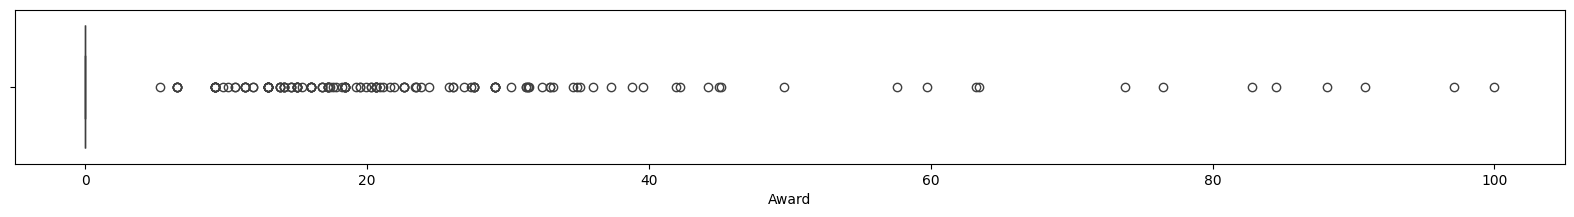

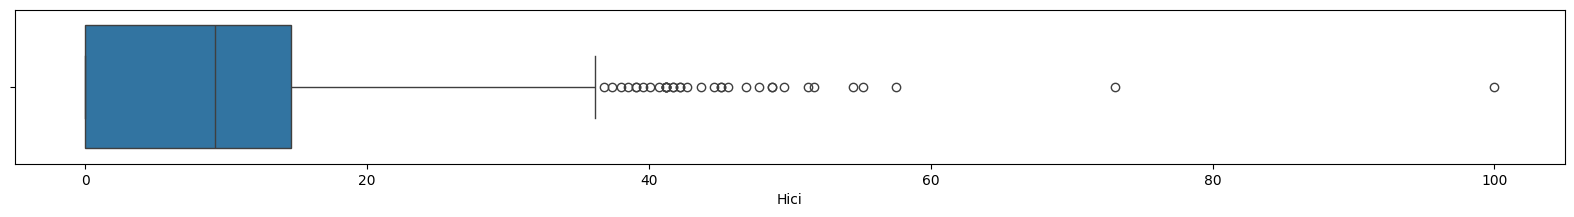

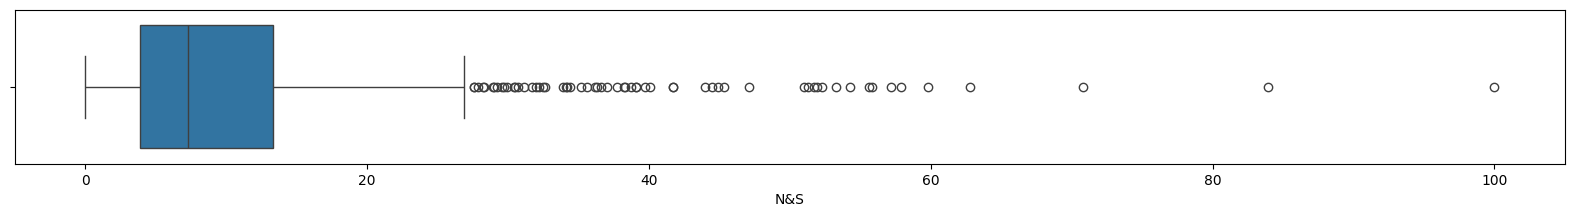

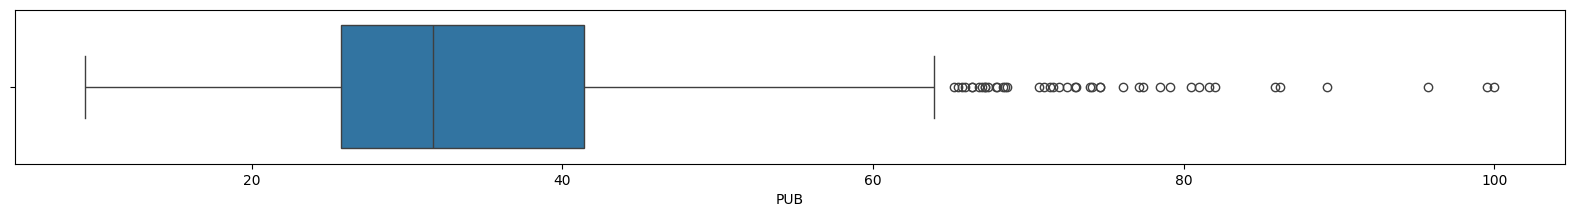

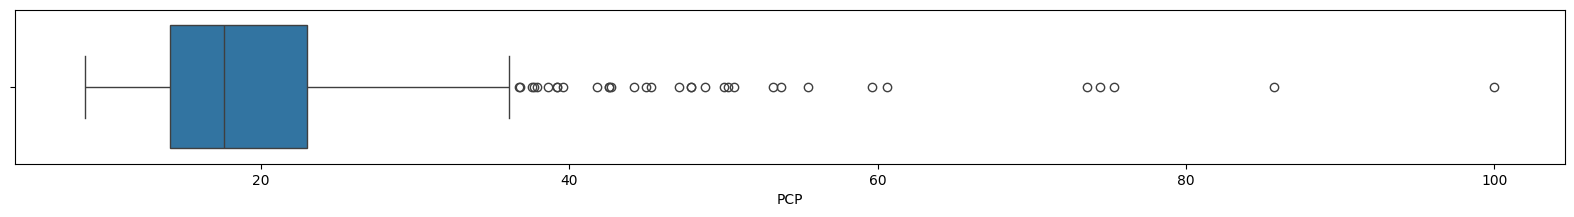

In [59]:
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

# Data Preperation

In [60]:
df.isna().sum()

Rank                       0
University_Name            0
National/Regional Rank     0
Alumni                     0
Award                      0
Hici                       0
N&S                       11
PUB                        0
PCP                        0
dtype: int64

In [61]:
length_missdata_percentage = (df['N&S'].isnull().sum() / df.shape[0]) * 100
length_missdata_percentage

1.0999999999999999

In [62]:
from sklearn.impute import KNNImputer

In [63]:
# Membuat instance KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Melakukan imputasi dengan KNN pada kolom 'length' di df_sample
imputed_data = imputer.fit_transform(df[['N&S']])

# Mengganti nilai kosong di df_sample dengan data yang telah diimputasi
df.loc[:, 'N&S'] = imputed_data

In [64]:
df.isna().sum()

Rank                      0
University_Name           0
National/Regional Rank    0
Alumni                    0
Award                     0
Hici                      0
N&S                       0
PUB                       0
PCP                       0
dtype: int64

In [65]:
iqr

Alumni     0.00
Award      0.00
Hici      14.60
N&S        9.40
PUB       15.65
PCP        8.90
dtype: float64

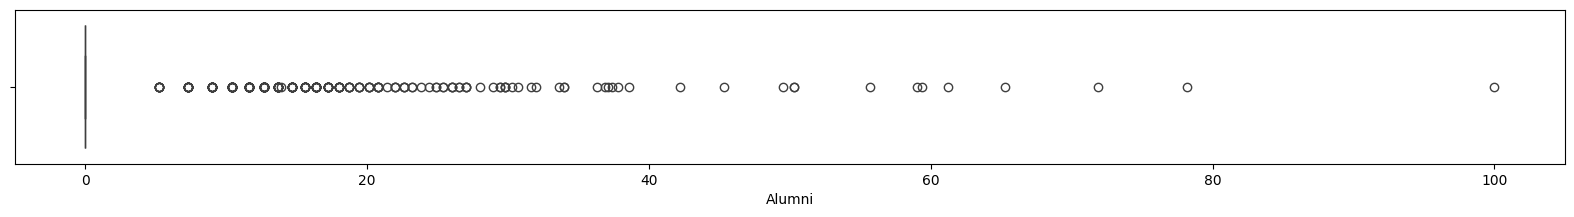

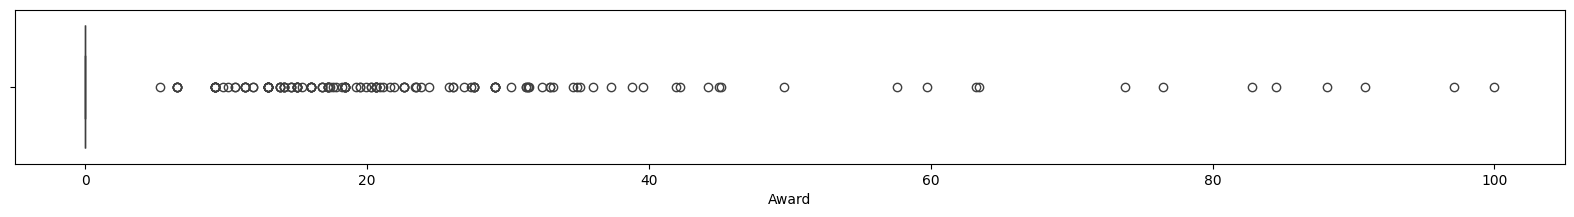

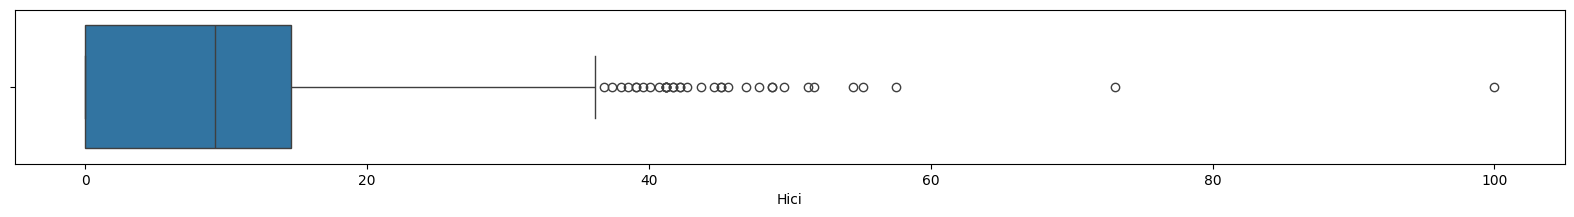

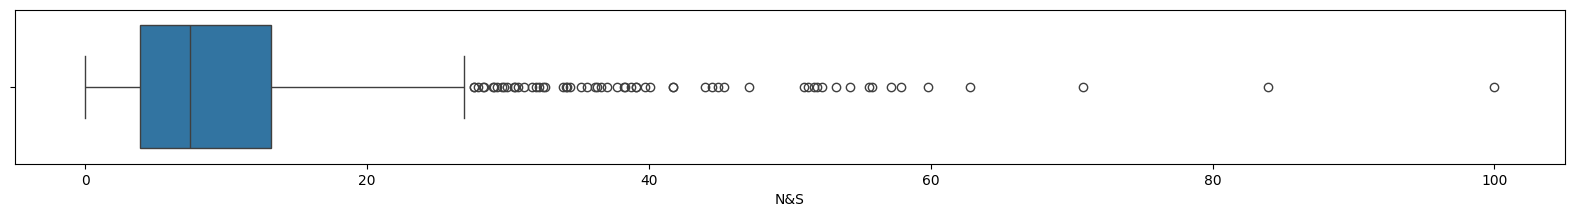

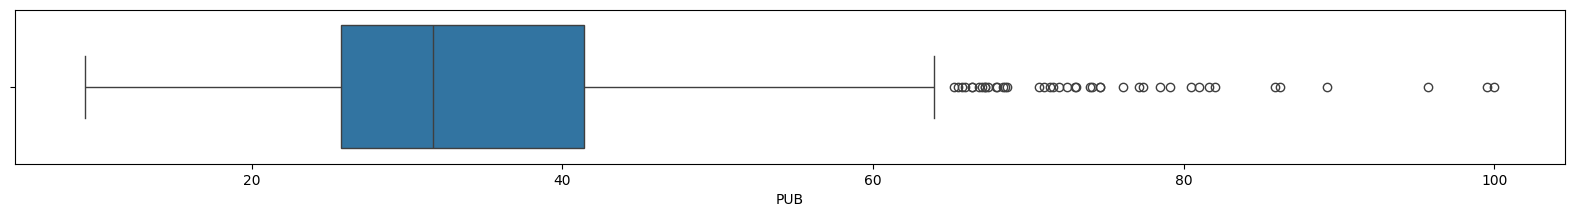

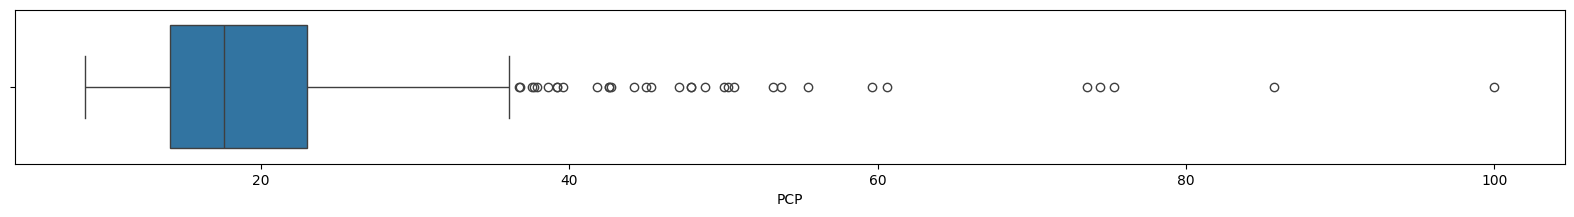

In [66]:
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [67]:
from scipy.stats.mstats import winsorize

In [68]:
df.shape

(1000, 9)

In [69]:
df['Hici'] = winsorize(df['Hici'], limits=[0, 0.05])
df['N&S'] = winsorize(df['N&S'], limits=[0, 0.05])
df['PUB'] = winsorize(df['PUB'], limits=[0, 0.05])
df['PCP'] = winsorize(df['PCP'], limits=[0, 0.05])

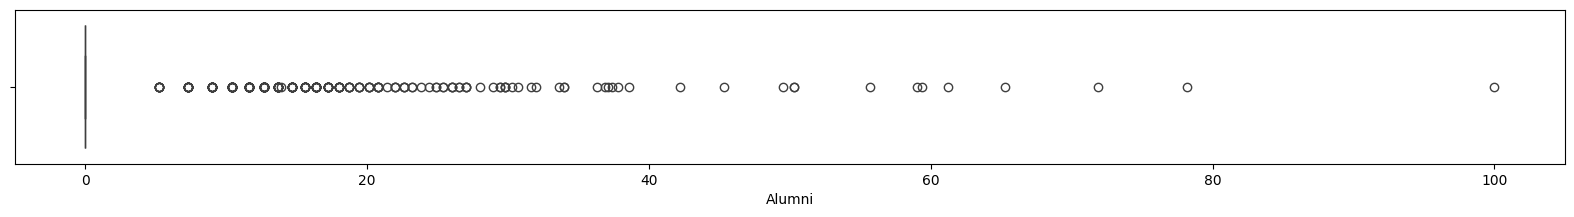

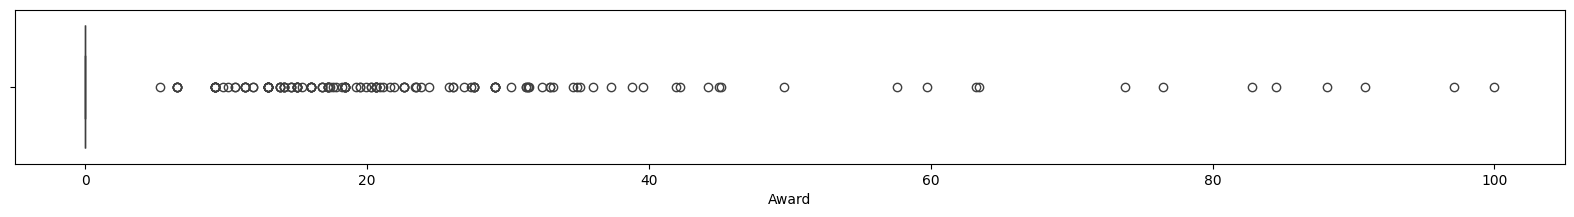

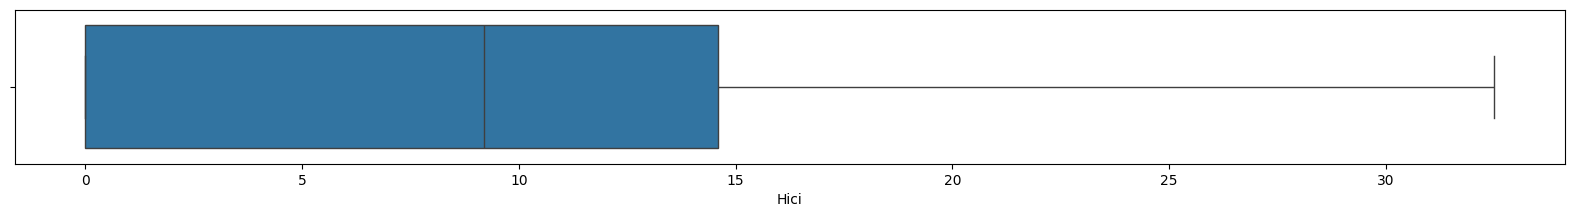

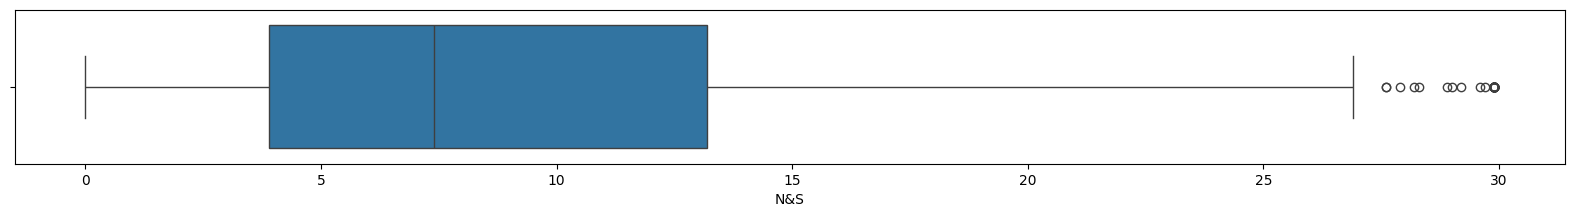

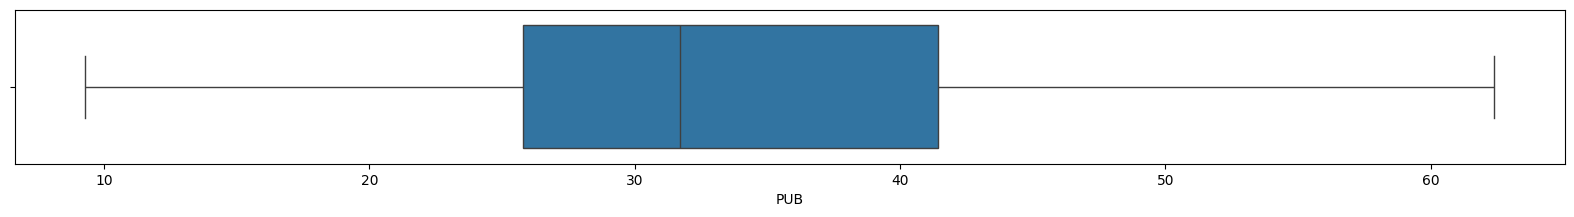

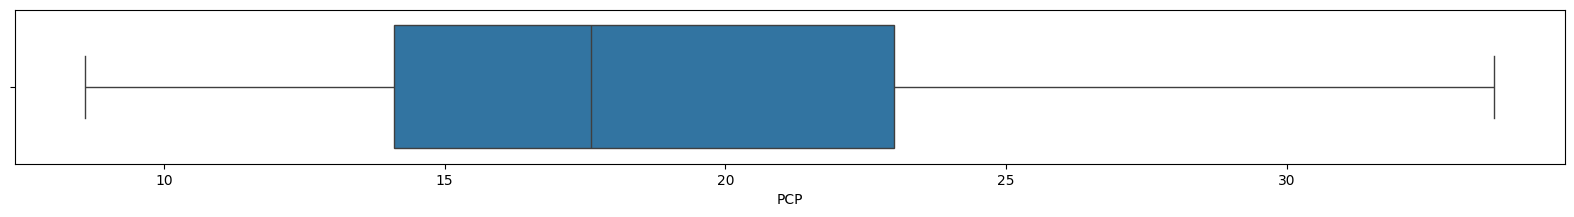

In [70]:
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [71]:
df.shape

(1000, 9)

<Axes: >

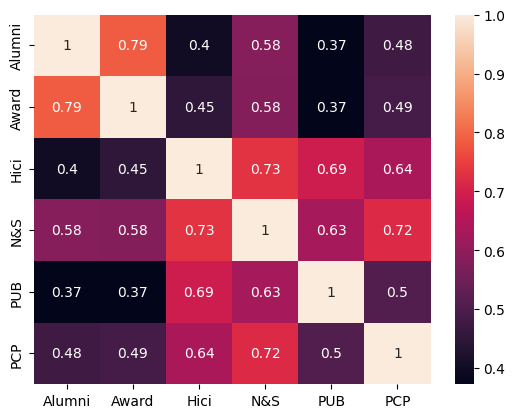

In [72]:
sns.heatmap(df.select_dtypes(exclude="object").corr(), annot=True)

In [93]:
df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,44.465000,499.500000,63.529000,4.509600,3.78120,10.201600,9.843226,34.575300,19.061900
std,24.646099,288.819436,42.543355,10.103201,11.45538,9.193121,7.921583,12.149067,6.566146
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.300000,8.600000
25%,26.000000,249.750000,24.000000,0.000000,0.00000,0.000000,3.900000,25.775000,14.100000
50%,45.000000,499.500000,64.500000,0.000000,0.00000,9.200000,7.400000,31.700000,17.600000
75%,64.000000,749.250000,105.000000,0.000000,0.00000,14.600000,13.200000,41.425000,23.000000
max,86.000000,999.000000,129.000000,100.000000,100.00000,32.500000,29.900000,62.400000,33.700000


# Model

In [73]:
dfknn = df

In [74]:
dfknn.head()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,32.5,29.9,62.4,33.7
1,2,Stanford University,2,45.3,88.1,32.5,29.9,62.4,33.7
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,32.5,29.9,59.1,33.7
3,4,University of Cambridge,1,78.2,90.8,32.5,29.9,62.4,33.7
4,5,"University of California, Berkeley",4,65.3,76.5,32.5,29.9,57.1,33.7


In [75]:
from sklearn.preprocessing import RobustScaler

In [76]:
scaler = RobustScaler()
dfknn[['Alumni','Award']] = scaler.fit_transform(dfknn[['Alumni','Award']])
dfknn.head()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,32.5,29.9,62.4,33.7
1,2,Stanford University,2,45.3,88.1,32.5,29.9,62.4,33.7
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,32.5,29.9,59.1,33.7
3,4,University of Cambridge,1,78.2,90.8,32.5,29.9,62.4,33.7
4,5,"University of California, Berkeley",4,65.3,76.5,32.5,29.9,57.1,33.7


In [77]:
cat_col = ['Rank','University_Name','National/Regional Rank']

In [78]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfknn[cat_col] = dfknn[cat_col].apply(le.fit_transform)

In [79]:
dfknn.head()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,0,203,0,100.0,97.1,32.5,29.9,62.4,33.7
1,12,516,40,45.3,88.1,32.5,29.9,62.4,33.7
2,24,327,70,71.9,82.8,32.5,29.9,59.1,33.7
3,35,673,0,78.2,90.8,32.5,29.9,62.4,33.7
4,43,663,91,65.3,76.5,32.5,29.9,57.1,33.7


In [80]:
X = dfknn[['Alumni', 'Award', 'Hici', 'N&S', 'PUB', 'PCP']].values  # Independent variables
y = dfknn['Rank'].values  # Dependent variable

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [82]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [83]:
knn = KNeighborsClassifier(n_neighbors= 3) # Menentukan jumlah tetangga terdekat (nearest neighbors)

# Melatih model
knn.fit(X_train, y_train)

# Melakukan validasi silang dengan membagi data pelatihan menjadi 5 lipatan (folds)
k = KFold(n_splits = 5)

# Menghitung skor akurasi untuk setiap lipatan menggunakan metode validasi silang yang telah ditentukan
score = cross_val_score(knn
                        , X_train, y_train
                        , scoring = 'accuracy' #Parameter yang ingin digunakan
                        , cv = k).mean() # cv=k -> jumlah lipatan, .mean() -> menghitung rata-rata skor akurasi

# Mencetak skor akurasi pada set data pelatihan dengan pembulatan ke 3 desimal
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.576


In [84]:
y_pred = knn.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

Accuracy on the test set: 0.63


In [85]:
# Membuat list kosong dalam variabel accuracy
accuracy = []

# Membuat loop dengan rentang nilai i dari 1-14 (Exclude 15)
# Loop akan menguji setiap n dari 1-14 untuk mencari n dengan akurasi yang paling tinggi

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)

    # Menyimpan skor akurasi pada setiap iterasi ke dalam list "accuracy"
    accuracy.append(accuracy_i)

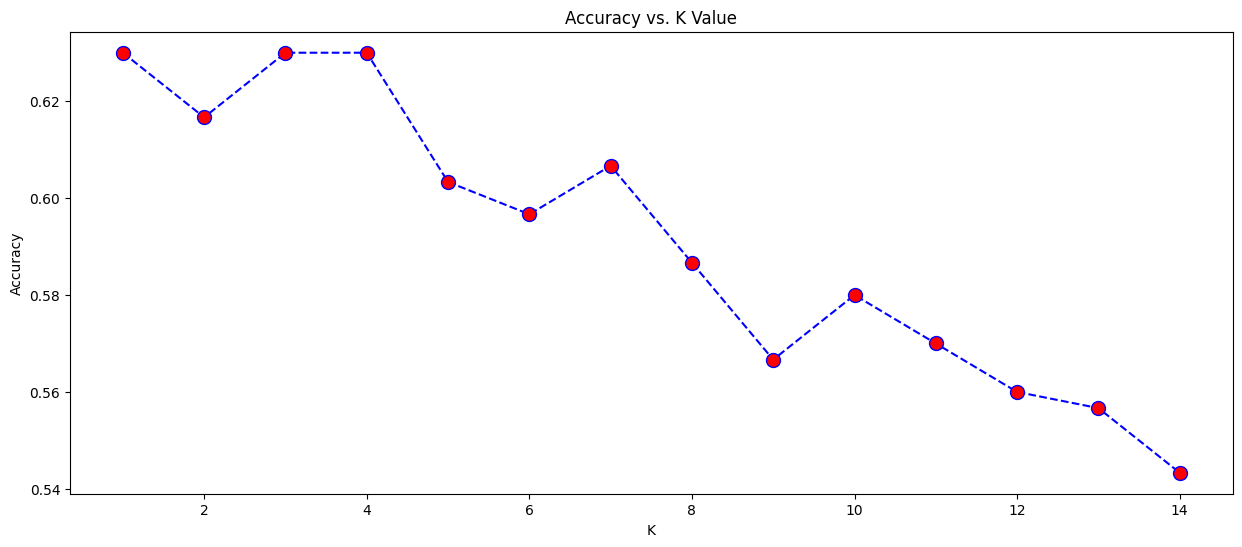

In [86]:
# Melihat akurasi dari setiap iterasi pada line chart
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [87]:
# Dapat dilihat dari grafik di atas bahwa akurasi paling tinggi didapatkan dengan n = 4
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {round(accuracy * 100, 2)}%")

Accuracy on the test set: 63.0%
